<a href="https://colab.research.google.com/github/eya-harbaoui/Customer_Churn_prediction/blob/main/TelecomChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#**Data Exploration**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read_data
customer_data_df=pd.read_csv("/content/drive/MyDrive/CustomerChurnPrediction/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
#first lines of dataset
customer_data_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#data columns
customer_data_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Features Description**

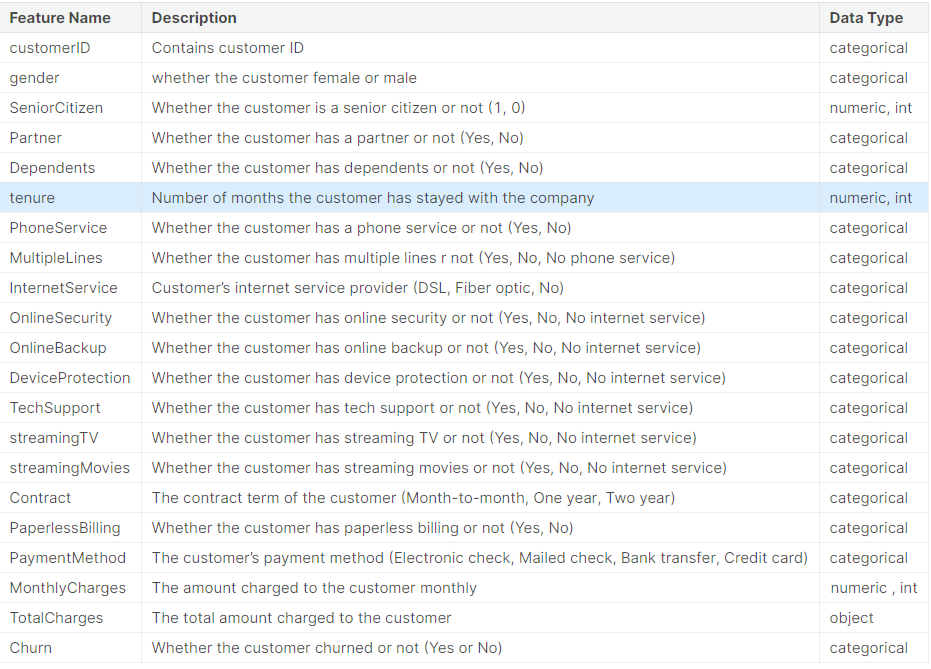

In [ ]:
#informations about dataset
# 3 numeric features and the other are categorical
#Total charges should be float but it appears as object
# Churn is the target : Yes or No : 0 or 1
customer_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


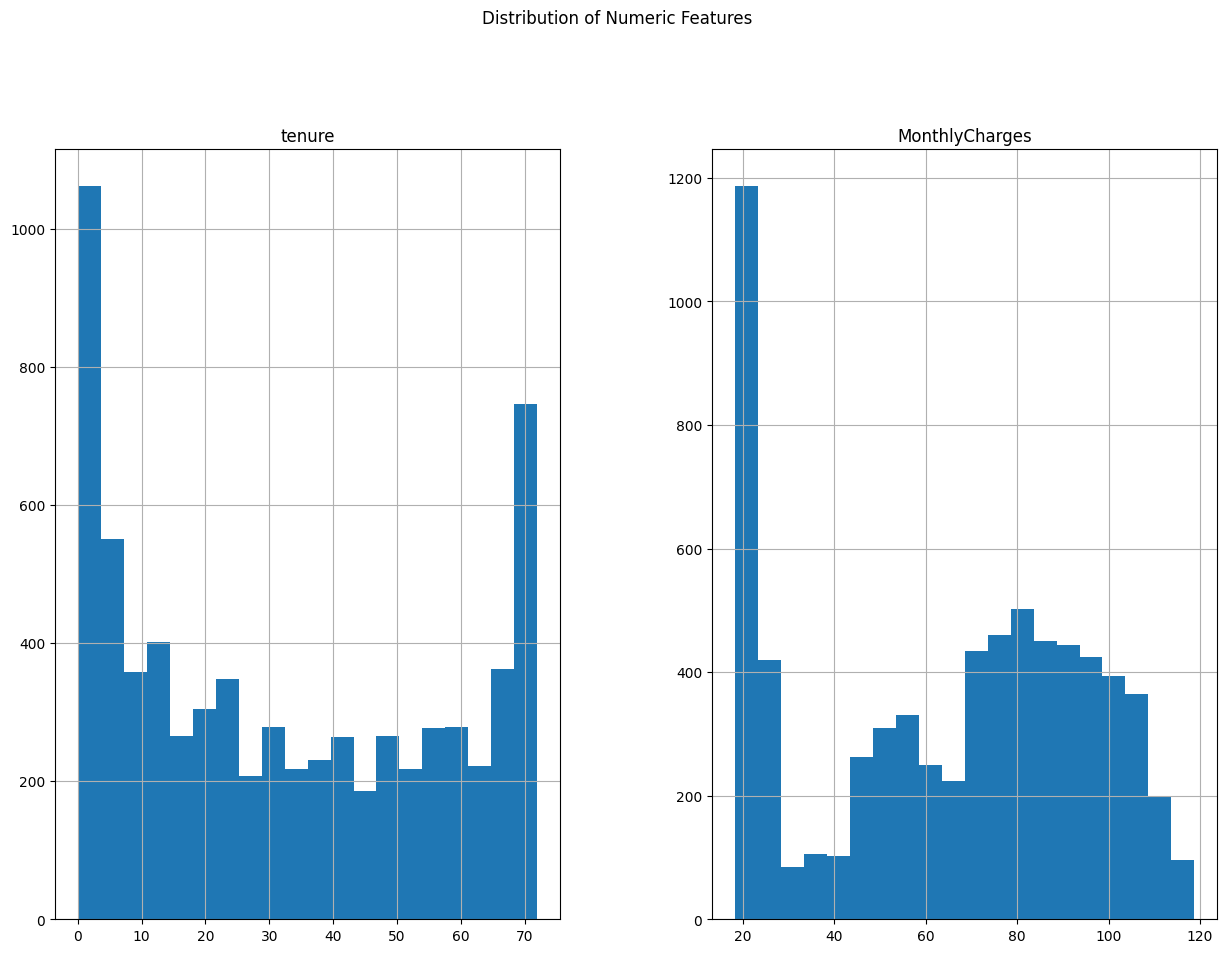

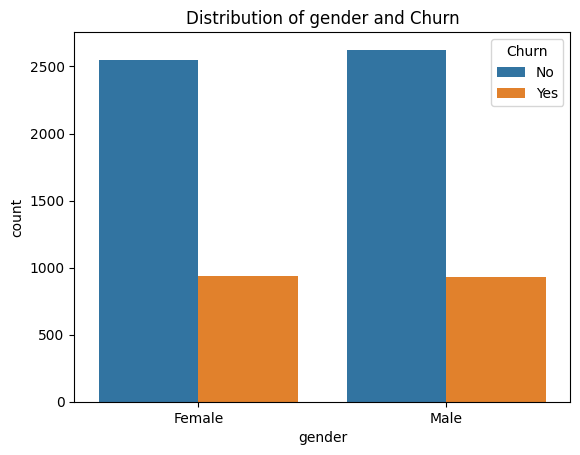

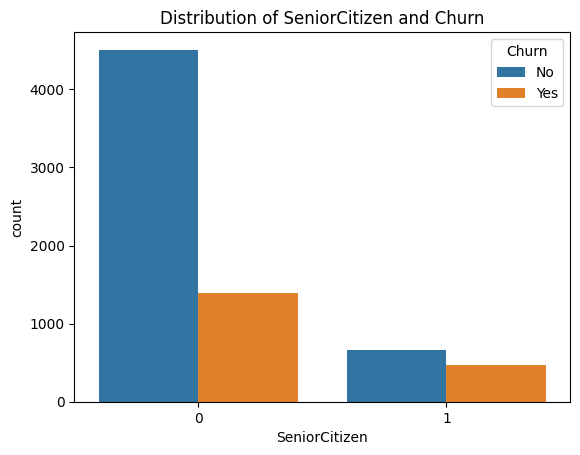

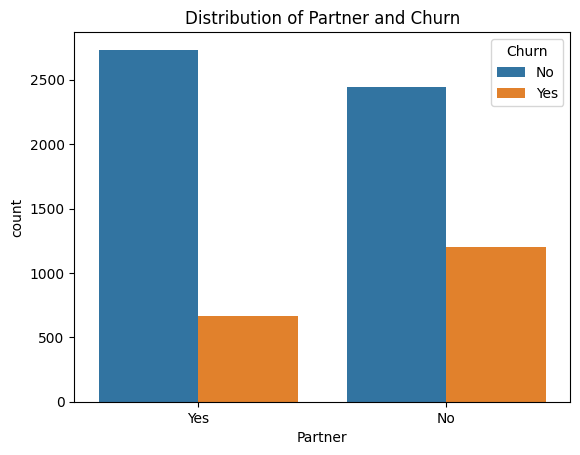

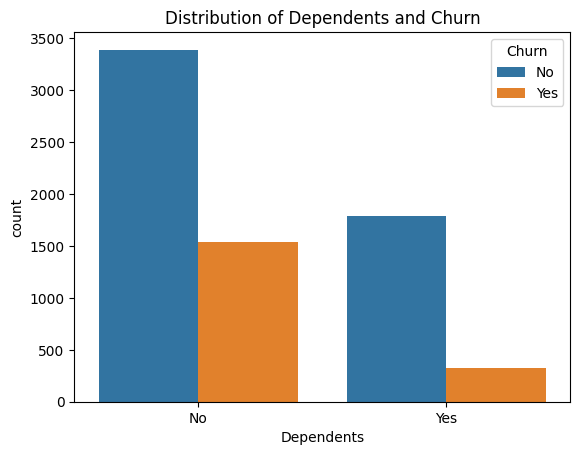

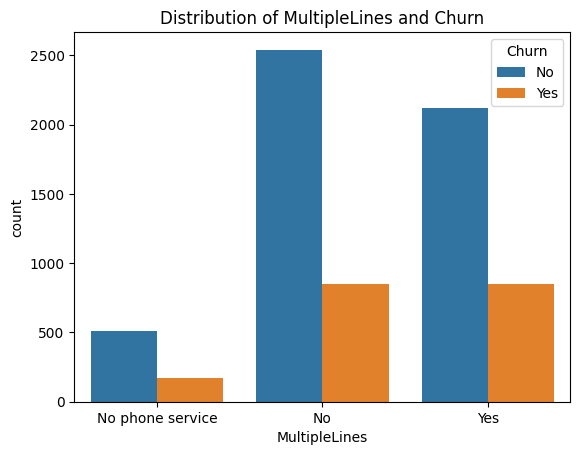

In [ ]:
# Explore distribution of numeric features
numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]
customer_data_df[numeric_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Features", y=1.02)
plt.show()

# Explore distribution of categorical features
categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents", "MultipleLines"]
for feature in categorical_features:
    sns.countplot(x=feature, hue="Churn", data=customer_data_df)
    plt.title(f"Distribution of {feature} and Churn")
    plt.show()


**change total charges to float type**

In [ ]:
#errors = "coerce" means that if it does not convert it , it becomes nan value
customer_data_df["TotalCharges"] = pd.to_numeric(customer_data_df["TotalCharges"], errors = 'coerce')

**Encode Categorical Features**

In [ ]:
Columns_to_replace=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
Columns_to_replace2=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for col in Columns_to_replace:
   customer_data_df[col] = customer_data_df[col].replace({'Yes': 1, 'No': 0});
for col in Columns_to_replace2:
   customer_data_df[col] = customer_data_df[col].replace({'Yes':1, 'No':0, 'No internet service':2});

In [ ]:
customer_data_df["InternetService"] = customer_data_df["InternetService"].replace({'DSL':1, 'Fiber optic':2,'No':0})
customer_data_df["gender"] = customer_data_df["gender"].replace({'Male':0, 'Female':1})
customer_data_df["MultipleLines"] = customer_data_df["MultipleLines"].replace({'Yes':1, 'No':0, 'No phone service':2})
customer_data_df["Contract"] = customer_data_df["Contract"].replace({'Month-to-month':0, 'One year':1, 'Two year':2})
customer_data_df["PaymentMethod"] = customer_data_df["PaymentMethod"].replace({'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})

In [ ]:
customer_data_df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1
5,9305-CDSKC,1,0,0,0,8,1,1,2,0,...,1,0,1,1,0,1,0,99.65,820.50,1
6,1452-KIOVK,0,0,0,1,22,1,1,2,0,...,0,0,1,0,0,1,3,89.10,1949.40,0
7,6713-OKOMC,1,0,0,0,10,0,2,1,1,...,0,0,0,0,0,0,1,29.75,301.90,0
8,7892-POOKP,1,0,1,0,28,1,1,2,0,...,1,1,1,1,0,1,0,104.80,3046.05,1
9,6388-TABGU,0,0,0,1,62,1,0,1,1,...,0,0,0,0,1,0,2,56.15,3487.95,0


In [ ]:
# data description : statistical values
customer_data_df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.615505,1.222916,0.720006,0.778220,0.777226,0.723555,0.817691,0.821241,0.690473,0.592219,1.315633,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.656039,0.778877,0.796885,0.778472,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


**Duplicates lines**

In [ ]:
#No duplicated lines in our dataset
duplicates_count = customer_data_df.duplicated().sum()
print("Number of duplicates:",duplicates_count)

Number of duplicates: 0


**Missing Values**

In [ ]:
missing_values_df = customer_data_df.isna()
sum_missing_values_df = missing_values_df.sum()
# Display the resulting DataFrame
print("sum_missing_values_df",sum_missing_values_df)
#we have 11 missing values in totalCharges

sum_missing_values_df customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# Filter the DataFrame to show only rows with missing values in 'totalCharges'
missing_values_df = customer_data_df[customer_data_df['TotalCharges'].isna()]
# Display the resulting DataFrame
print(missing_values_df)
# I noticed that when tenure is equal to zero (the number of months the customer have stayed with the company )
# The totalCharges are none (and logically they have to be zero or equal to monthly charges)
# I will represent the correlation matrix to show that changed NaN values in totalCharges depend of tenure variable

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
488   4472-LVYGI       1              0        1           1       0   
753   3115-CZMZD       0              0        0           1       0   
936   5709-LVOEQ       1              0        1           1       0   
1082  4367-NUYAO       0              0        1           1       0   
1340  1371-DWPAZ       1              0        1           1       0   
3331  7644-OMVMY       0              0        1           1       0   
3826  3213-VVOLG       0              0        1           1       0   
4380  2520-SGTTA       1              0        1           1       0   
5218  2923-ARZLG       0              0        1           1       0   
6670  4075-WKNIU       1              0        1           1       0   
6754  2775-SEFEE       0              0        0           1       0   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
488              0              2                1          

**Correlation between variables**

In [ ]:
correlation_matrix = customer_data_df.corr()

<ipython-input-108-195927a018cc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = customer_data_df.corr()


<Axes: >

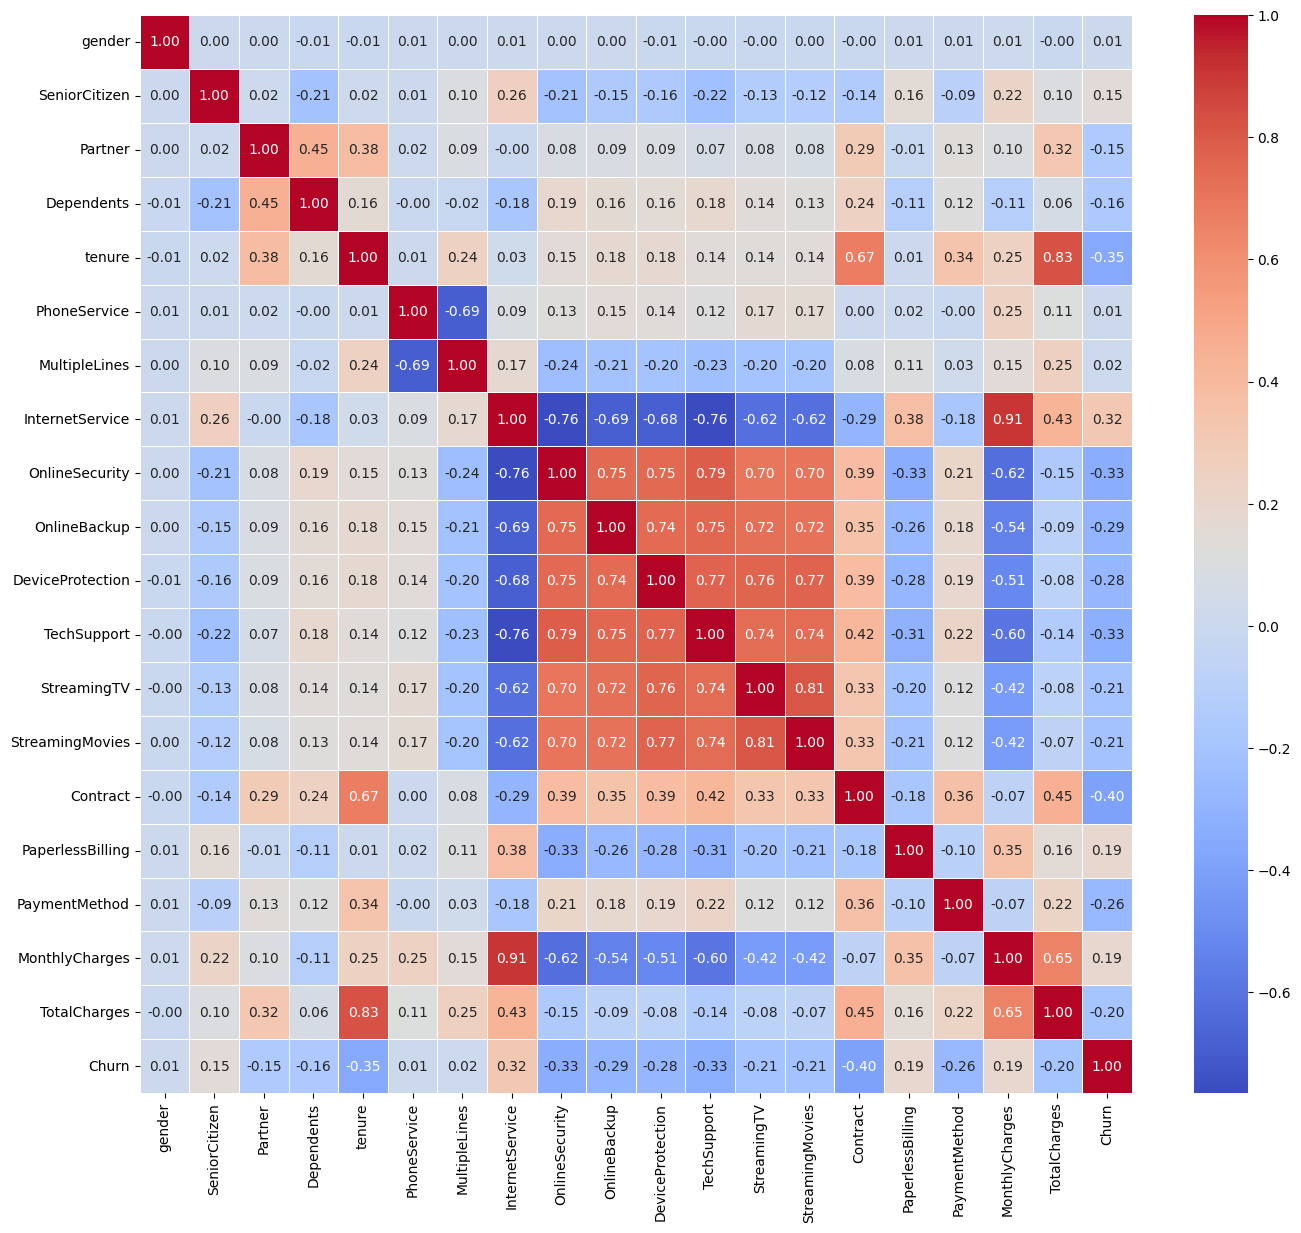

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

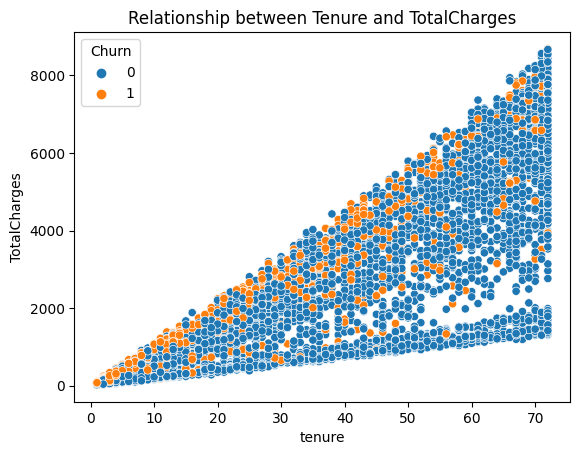

In [ ]:
# Visualize relationships between 'tenure' and 'TotalCharges'
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=customer_data_df)
plt.title("Relationship between Tenure and TotalCharges")
plt.show()

**Filling Missing Values**

In [ ]:
#We are going to change NaN values with zeros
customer_data_df.fillna(0, inplace=True)

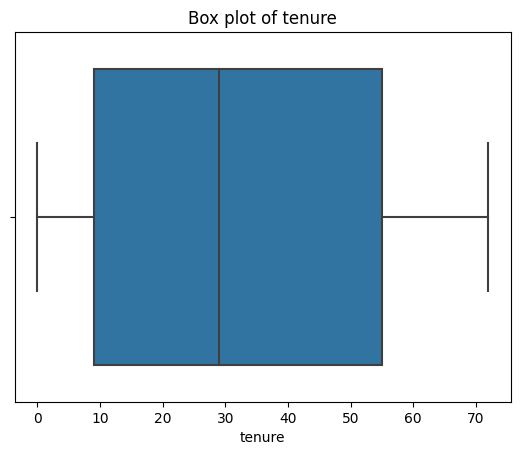

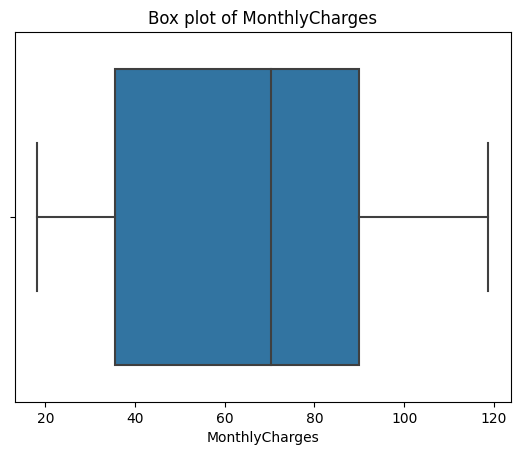

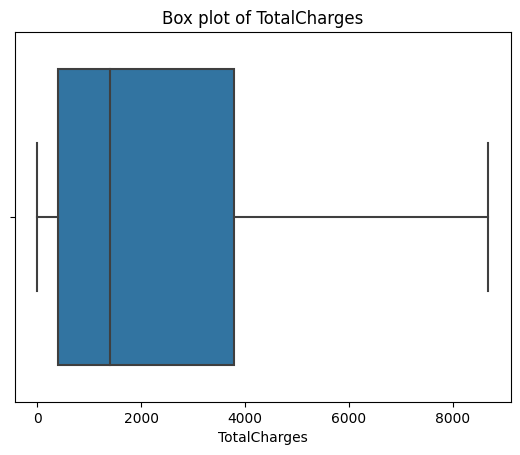

In [ ]:
# Check for outliers in numeric features
for feature in numeric_features:
    sns.boxplot(x=customer_data_df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()


**removing columns**

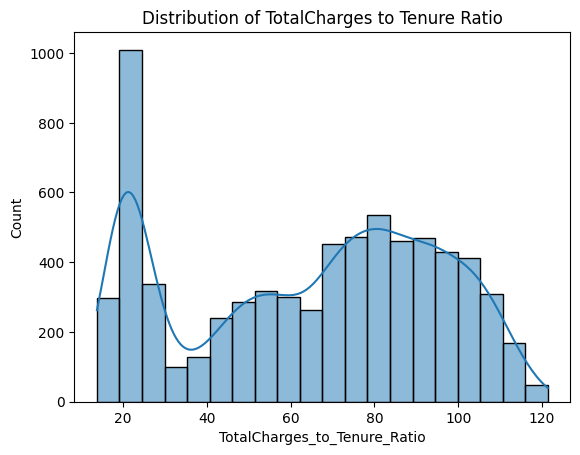

In [ ]:
# Create a new feature: 'TotalCharges to Tenure Ratio'
customer_data_df['TotalCharges_to_Tenure_Ratio'] = customer_data_df['TotalCharges'] / customer_data_df['tenure']

# Visualize the distribution of the new feature
sns.histplot(customer_data_df['TotalCharges_to_Tenure_Ratio'], bins=20, kde=True)
plt.title('Distribution of TotalCharges to Tenure Ratio')
plt.show()

In [ ]:
columns_to_remove = ["tenure", "MonthlyCharges","TotalCharges","customerID"]

# Drop the columns from the dataset
customer_data_df = customer_data_df.drop(columns_to_remove, axis=1)

# Print the updated dataset
print(customer_data_df.head())

   gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0       1              0        1           0             0              2   
1       0              0        0           0             1              0   
2       0              0        0           0             1              0   
3       0              0        0           0             0              2   
4       1              0        0           0             1              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                1               0             1                 0   
1                1               1             0                 1   
2                1               1             1                 0   
3                1               1             0                 1   
4                2               0             0                 0   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0       

In [ ]:
customer_data_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,TotalCharges_to_Tenure_Ratio
0,1,0,1,0,0,2,1,0,1,0,0,0,0,0,1,0,0,29.850000
1,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,55.573529
2,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,54.075000
3,0,0,0,0,0,2,1,1,0,1,1,0,0,1,0,2,0,40.905556
4,1,0,0,0,1,0,2,0,0,0,0,0,0,0,1,0,1,75.825000


**Amount of churned customers**

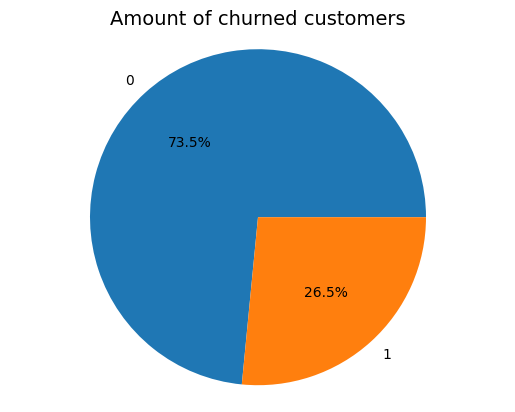

In [ ]:
target = customer_data_df["Churn"].value_counts() #value_counts calculate the occurence of churn values
fig1, ax1 = plt.subplots()
ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()
#We Have 26.5% of customers that churned ====> we can say that we have umbalanced data

In [ ]:
import pandas as pd
from sklearn.utils import resample

# Assuming your dataset is named customer_data_df

# Separate the minority and majority class
minority_class = customer_data_df[customer_data_df['Churn'] == 1]
majority_class = customer_data_df[customer_data_df['Churn'] == 0]

# Calculate the number of samples to create for the minority class
desired_ratio = 0.40  # Desired ratio for the minority class
minority_count = len(minority_class)
majority_count = len(majority_class)
new_minority_count = int(desired_ratio * majority_count / (1 - desired_ratio))

# Oversample the minority class
oversampled_minority = resample(minority_class, n_samples=new_minority_count, replace=True, random_state=42)

# Update the original DataFrame with the oversampled minority class
customer_data_df = pd.concat([majority_class, oversampled_minority])


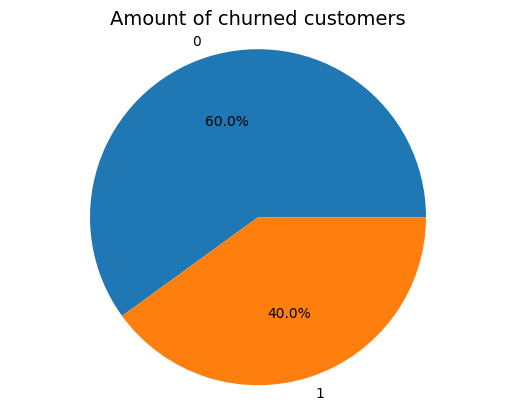

In [ ]:
target = customer_data_df["Churn"].value_counts() #value_counts calculate the occurence of churn values
fig1, ax1 = plt.subplots()
ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()

In [ ]:
# Some functions to generate in the next steps pie plots and bar plots for different features

churned = customer_data_df[customer_data_df['Churn'] == 1]
nonchurned = customer_data_df[customer_data_df['Churn'] == 0]

def plot_pie(column):
    target = customer_data_df[column].value_counts()
    fig1, ax1 = plt.subplots()
    ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
    ax1.axis('equal')
    plt.title("All customers", fontsize=14)
    plt.show()


def plot_compare(column, category_name):
    NChurned = len(churned[column].unique())
    NNonChurned = len(nonchurned[column].unique())

    ChurnedCounts = churned[column].value_counts().sort_index()
    NonChurnedCounts = nonchurned[column].value_counts().sort_index()

    indchurned = np.arange(NChurned)    # the x locations for the groups
    indnonchurned = np.arange(NNonChurned)
    width = 1       # the width of the bars: can also be len(x) sequence

    figs, axs = plt.subplots(1,2, figsize=(12,5))

    axs[1].bar(indchurned, ChurnedCounts, width, color='#DD8452')
    axs[1].set_title('Churned ' + category_name, fontsize=20)
    axs[1].set_xticks(indchurned)
    axs[1].set_xticklabels(ChurnedCounts.index.tolist(), rotation=45)

    axs[0].bar(indnonchurned, NonChurnedCounts, width, color='b')
    axs[0].set_title('Non Churned ' + category_name, fontsize=20)
    axs[0].set_ylabel('Amount of People')
    axs[0].set_xticks(indnonchurned)
    axs[0].set_xticklabels(NonChurnedCounts.index.tolist(), rotation=45)


    plt.show()

**Comparing the distrubtion of churned and nonchurned customers using gender feature**

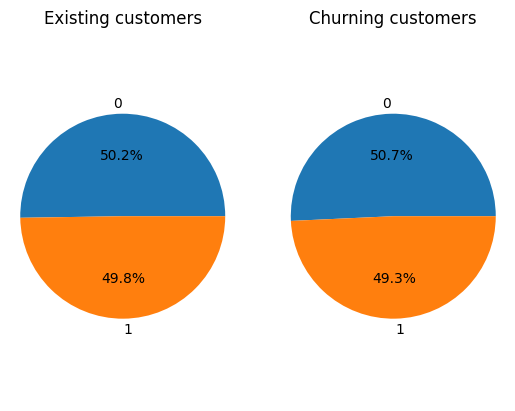

In [ ]:
churnedtarget = churned["gender"].value_counts()
nonchurnedtarget = nonchurned["gender"].value_counts()

fig1, axs = plt.subplots(1, 2)

axs[0].pie(churnedtarget, labels=churnedtarget.index, autopct='%1.1f%%', shadow=None)
axs[0].axis('equal')
axs[0].set_title('Existing customers')

axs[1].pie(nonchurnedtarget, labels=nonchurnedtarget.index, autopct='%1.1f%%', shadow=None)
axs[1].axis('equal')
axs[1].set_title('Churning customers')

plt.show()

In [ ]:
customer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8623 entries, 0 to 4789
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        8623 non-null   int64  
 1   SeniorCitizen                 8623 non-null   int64  
 2   Partner                       8623 non-null   int64  
 3   Dependents                    8623 non-null   int64  
 4   PhoneService                  8623 non-null   int64  
 5   MultipleLines                 8623 non-null   int64  
 6   InternetService               8623 non-null   int64  
 7   OnlineSecurity                8623 non-null   int64  
 8   OnlineBackup                  8623 non-null   int64  
 9   DeviceProtection              8623 non-null   int64  
 10  TechSupport                   8623 non-null   int64  
 11  StreamingTV                   8623 non-null   int64  
 12  StreamingMovies               8623 non-null   int64  
 13  Con

#**Feature Engineering -Feature Selection**

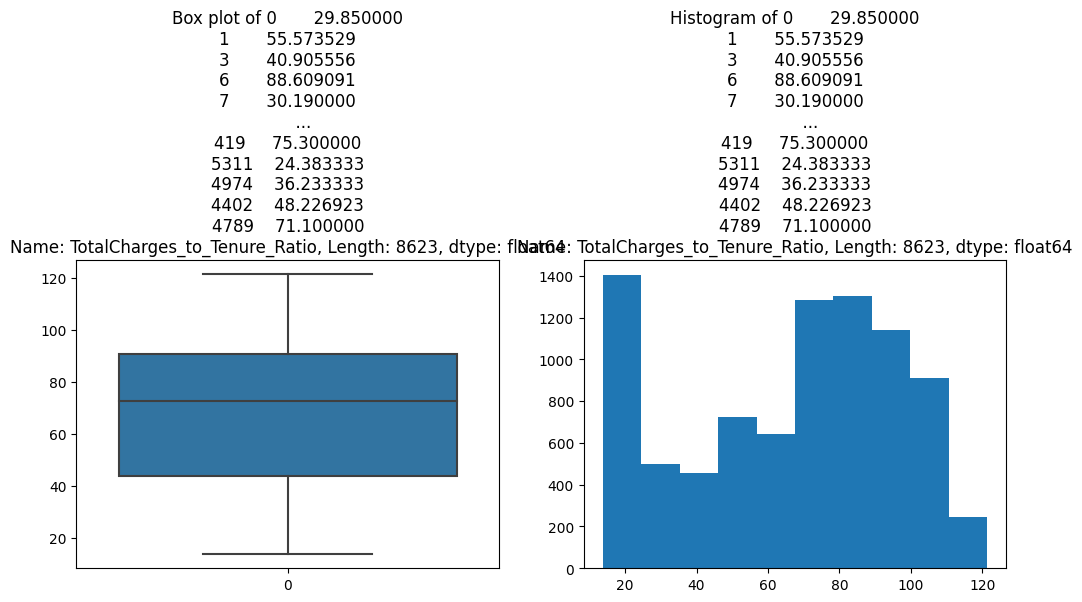

In [ ]:
plt.figure(figsize=(12, 4))
# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(customer_data_df["TotalCharges_to_Tenure_Ratio"])
plt.title(f'Box plot of {customer_data_df["TotalCharges_to_Tenure_Ratio"]}')
# Histogram
plt.subplot(1, 2, 2)
plt.hist(customer_data_df["TotalCharges_to_Tenure_Ratio"])
plt.title(f'Histogram of {customer_data_df["TotalCharges_to_Tenure_Ratio"]}')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# non-skewed (symmetric)
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Extract the column as a NumPy array and reshape it
total_charges_values = customer_data_df["TotalCharges_to_Tenure_Ratio"].values.reshape(-1, 1)

# Normalize the non-skewed variables and add them to the DataFrame
scaled_charges = scaler.fit_transform(total_charges_values)
customer_data_df["TotalCharges_to_Tenure_Ratio_scaled"] = scaled_charges
# Display the DataFrame with the normalized columns
print(customer_data_df)


      gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0          1              0        1           0             0              2   
1          0              0        0           0             1              0   
3          0              0        0           0             0              2   
6          0              0        0           1             1              1   
7          1              0        0           0             0              2   
...      ...            ...      ...         ...           ...            ...   
419        1              1        0           0             1              0   
5311       1              0        1           0             1              0   
4974       0              0        0           0             0              2   
4402       0              0        0           0             0              2   
4789       1              0        0           0             1              0   

      InternetService  Onli

#**Training & Evaluation**

**Logistic Regression**

**Data Split**

In [ ]:
from sklearn.model_selection import train_test_split
X = customer_data_df.drop('Churn', axis=1)
y = customer_data_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [ ]:
best_model

LogisticRegression(C=0.1)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = best_model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(confusion)

Matrice de confusion :
[[821 217]
 [218 469]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Supposons que vous ayez déjà calculé la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")
# Calcul de la précision
precision = precision_score(y_test, y_pred)
print(f"Precision : {precision:.2f}")
# Calcul du rappel (recall)
recall = recall_score(y_test, y_pred)
print(f"Recall : {recall:.2f}")
# Calcul du score F1
f1 = f1_score(y_test, y_pred)
print(f"F1 Score : {f1:.2f}")


Accuracy : 0.75
Precision : 0.68
Recall : 0.68
F1 Score : 0.68


**KNN**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
knn_classifier = KNeighborsClassifier()
# Define a grid of hyperparameters to search
param_grid = {'n_neighbors': [3, 5, 7, 9,11,13]}

# Create a grid search object
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)

# Perform the grid search on your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# Fit the KNN classifier with the best k to the training data
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate ROC curve and AUC
y_scores = knn_classifier.predict_proba(X_test)[:, 1]  # Probability estimates
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Print the evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)


Confusion Matrix:
 [[768 270]
 [119 568]]
Accuracy: 0.7744927536231884
Precision: 0.6778042959427207
F1 Score: 0.7449180327868853


In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(probability=True)

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

# Create a grid search object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Perform the grid search on your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_svm_classifier = SVC(**best_params, probability=True)

# Fit the best SVM classifier to the training data
best_svm_classifier.fit(X_train, y_train)


SVC(C=10, probability=True)

In [ ]:
best_kernel = best_svm_classifier.kernel
print("The best kernel is:", best_kernel)

The best kernel is: rbf


In [ ]:
best_svm_classifier

SVC(C=10, probability=True)

Confusion Matrix:
 [[815 223]
 [164 523]]
Accuracy: 0.7756521739130435
Precision: 0.7010723860589813
F1 Score: 0.7299371946964411
AUC (ROC): 0.839020426135806


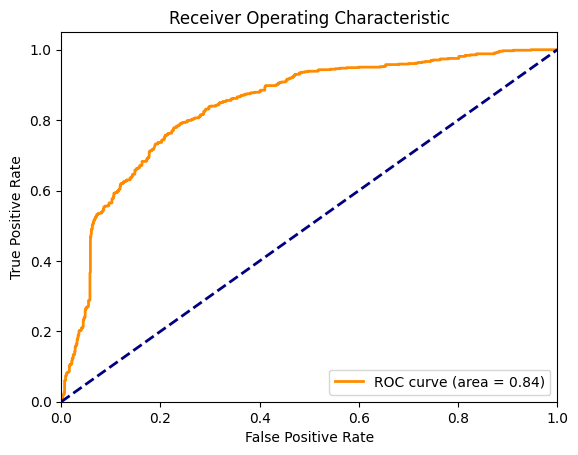

In [ ]:
# Make predictions on the test data
y_pred = best_svm_classifier.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate ROC curve and AUC
y_scores = best_svm_classifier.predict_proba(X_test)[:, 1]  # Probability estimates
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Print the evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

**Decision Tree**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)


# Print the evaluation results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("\nConfusion Matrix:\n", confusion)



Accuracy: 83.59%

Confusion Matrix:
 [[842 196]
 [ 87 600]]


In [ ]:
# Define a parameter grid for Grid Search
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), parameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test data
best_dt_classifier = grid_search.best_estimator_
y_pred = best_dt_classifier.predict(X_test)

# Calculate accuracy and generate a classification report for the tuned model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Tuned Model):", accuracy)

print("Classification Report (Tuned Model):\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy (Tuned Model): 0.8301449275362319
Classification Report (Tuned Model):
               precision    recall  f1-score   support

           0       0.90      0.81      0.85      1038
           1       0.75      0.86      0.80       687

    accuracy                           0.83      1725
   macro avg       0.82      0.84      0.83      1725
weighted avg       0.84      0.83      0.83      1725



In [ ]:
from sklearn.tree import export_text
import graphviz
from sklearn import tree

# Assuming 'clf' is your trained decision tree classifier
# Export the decision tree to a DOT file
tree.export_graphviz(best_dt_classifier, out_file="tree.dot", feature_names=X.columns, class_names=["no", "yes"], filled=True, rounded=True)

# Visualize the tree
with open("tree.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.render("decision_tree1")  # This will save a PDF or another format based on your Graphviz setup

'decision_tree1.pdf'

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [100, 500, 1000,1500,2000],
    'max_leaf_nodes': [None, 5, 10, 20, 23],

}

grid_search_rf = GridSearchCV(rf_classifier, param_grid, cv=5)

grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_

best_rf_accuracy = best_rf.score(X_test, y_test)
print(f'Best Random Forest Accuracy: {best_rf_accuracy * 100:.2f}%')

print("Best Parameters: ", grid_search_rf.best_params_)


Best Random Forest Accuracy: 86.84%
Best Parameters:  {'max_leaf_nodes': None, 'n_estimators': 1000}
